## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir("D:/")

## Data Collection and Data Analysis

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
# print first 5 row of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# statistical measure of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# check null value of dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# number of row and column
df.shape

(1338, 7)

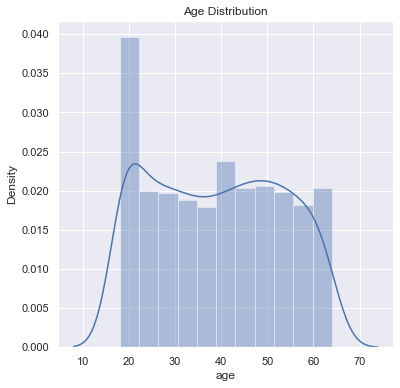

In [16]:
# distribution plot of Age column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

male      676
female    662
Name: sex, dtype: int64


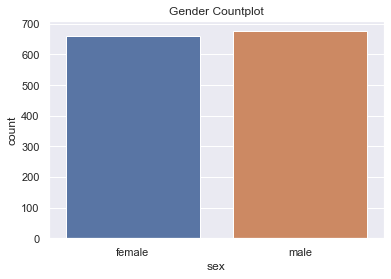

In [21]:
# countplot of gender given in dataset
sns.countplot("sex",data=df)
plt.title("Gender Countplot")
print(df["sex"].value_counts())

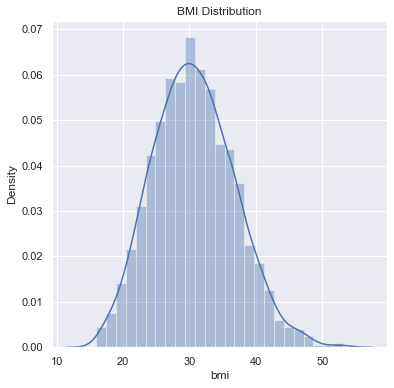

In [22]:
# distirbution plot of bmi column
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


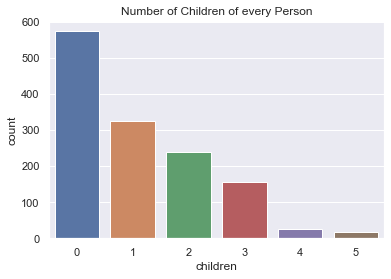

In [24]:
# countplot of children column
sns.countplot("children",data=df)
plt.title("Number of Children of every Person")
print(df["children"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


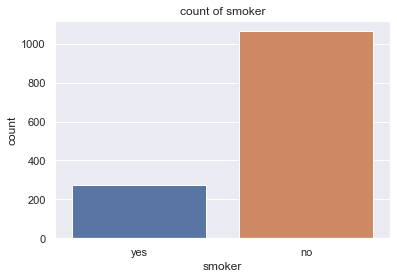

In [26]:
# countplot of smoker column
sns.countplot(df["smoker"])
plt.title("count of smoker")
print(df["smoker"].value_counts())

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


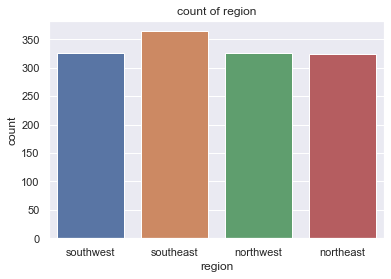

In [27]:
# countplot of region column
sns.countplot(df["region"])
plt.title("count of region")
print(df["region"].value_counts())

Text(0.5, 1.0, 'charges distribution')

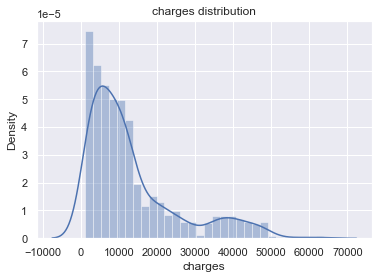

In [28]:
# distribution plot of charges column
sns.distplot(df["charges"])
plt.title("charges distribution")

## Data Preprocessing

In [31]:
# Label Encoding
df.replace({"sex":{"female":0,"male":1},"smoker":{"no":0,"yes":1},
           "region":{"southwest":0,"southeast":1,"northwest":2,"northeast":3}},inplace=True)

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [34]:
# separate the data and label
x=df.drop("charges",axis=1)
y=df.charges

In [35]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Train Test Split

In [36]:
# load library 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [37]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


## using loop for show best accuracy on which library

In [39]:
# import all library
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
from sklearn.metrics import r2_score

In [42]:
model=[LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor]

In [47]:
for mod in model:
    reg=mod()
    reg=reg.fit(x_train,y_train)
    y_train_pred=reg.predict(x_train)
    y_test_pred=reg.predict(x_test)
    print(mod,"R2 Score Train Data",r2_score(y_train,y_train_pred))
    print(mod,"R2 Score Test Data",r2_score(y_test,y_test_pred))
    print("---------------------")

<class 'sklearn.linear_model._base.LinearRegression'> R2 Score Train Data 0.7633895728397835
<class 'sklearn.linear_model._base.LinearRegression'> R2 Score Test Data 0.6957010622294884
---------------------
<class 'sklearn.svm._classes.SVR'> R2 Score Train Data -0.1030459582338954
<class 'sklearn.svm._classes.SVR'> R2 Score Test Data -0.1311128572402942
---------------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> R2 Score Train Data 0.43524021022503634
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> R2 Score Test Data 0.08771010390890133
---------------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> R2 Score Train Data 1.0
<class 'sklearn.tree._classes.DecisionTreeRegressor'> R2 Score Test Data 0.6996681756222736
---------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'> R2 Score Train Data 0.9774402554282975
<class 'sklearn.ensemble._forest.RandomForestRegressor'> R2 Score Test Data 0.8088197926192169
------------------

## Model Training

In [48]:
models=LinearRegression()

In [49]:
models.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [50]:
# R2 Score on Training Data
y_train_pred=models.predict(x_train)
train_r2_score=r2_score(y_train,y_train_pred)
print(train_r2_score)

0.7633895728397835


In [52]:
# R2 Score on Test Data
y_test_pred=models.predict(x_test)
test_r2_score=r2_score(y_test,y_test_pred)
print(test_r2_score)

0.6957010622294884


## Making a Predictive System


In [54]:
input_data=(32,1,28.880,0,0,2)

# convert input data to numpy array
input_data_numpy_array=np.asarray(input_data)

# reshape the input data
reshape_input_data=input_data_numpy_array.reshape(1,-1)

# prediction
prediction=models.predict(reshape_input_data)
print(prediction)

[5238.7826915]
